# Dark Energy $c_s^2$ data analysis
Author: João Victor Rebouças, May 2025

In [1]:
from importlib import reload
from copy import copy

import numpy as np
from getdist import plots as gdplot

import matplotlib as mpl

import utils

mpl.rcParams['mathtext.fontset'] = "stix"
mpl.rcParams['font.family'] = "STIXGeneral"

## 1. LSS data

In [22]:
# Load chains
des_indices = [29, 30, 31]
chains = {}
settings = copy(utils.DEFAULT_GETDIST_SETTINGS)
settings['smooth_scale_2D'] = 0.4
for i in des_indices:
    chains[i] = utils.load_chain(i, settings=settings)

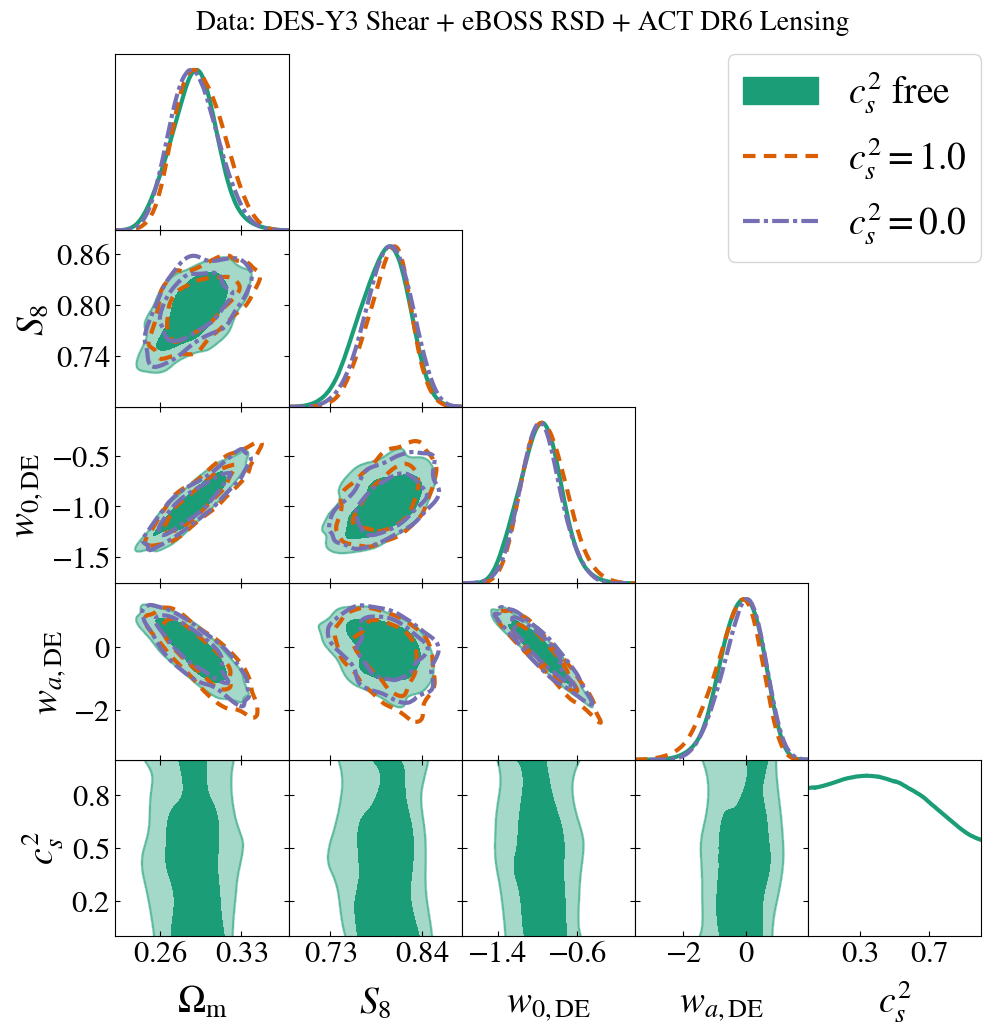

In [23]:
p = gdplot.get_subplot_plotter()
p.settings.axes_fontsize=25
p.settings.axes_labelsize=30
p.settings.legend_fontsize=30
p.triangle_plot(
    [chains[31], chains[29], chains[30]],
    ["omegam", "S8", "w", "wa", "cs2_0"],
    filled=[True, False, False],
    contour_colors=utils.colors,
    contour_lws=3,
    contour_ls=["-", "--", "-."],
    legend_labels=["$c_s^2$ free", "$c_s^2 = 1.0$", "$c_s^2 = 0.0$"],
    legend_loc="upper right"
)
p.fig.text(0.2, 1.01, "Data: DES-Y3 Shear + eBOSS RSD + ACT DR6 Lensing", fontsize=20)
p.fig.savefig("plots/triangle_desshear_rsd_actcmbl.pdf", bbox_inches="tight")

## 2. Including late-time distances to LSS data

In [15]:
# Load chains
des_indices = range(31, 35)
chains = {}
settings = copy(utils.DEFAULT_GETDIST_SETTINGS)
settings['smooth_scale_2D'] = 0.4
for i in des_indices:
    chains[i] = utils.load_chain(i, settings=settings)

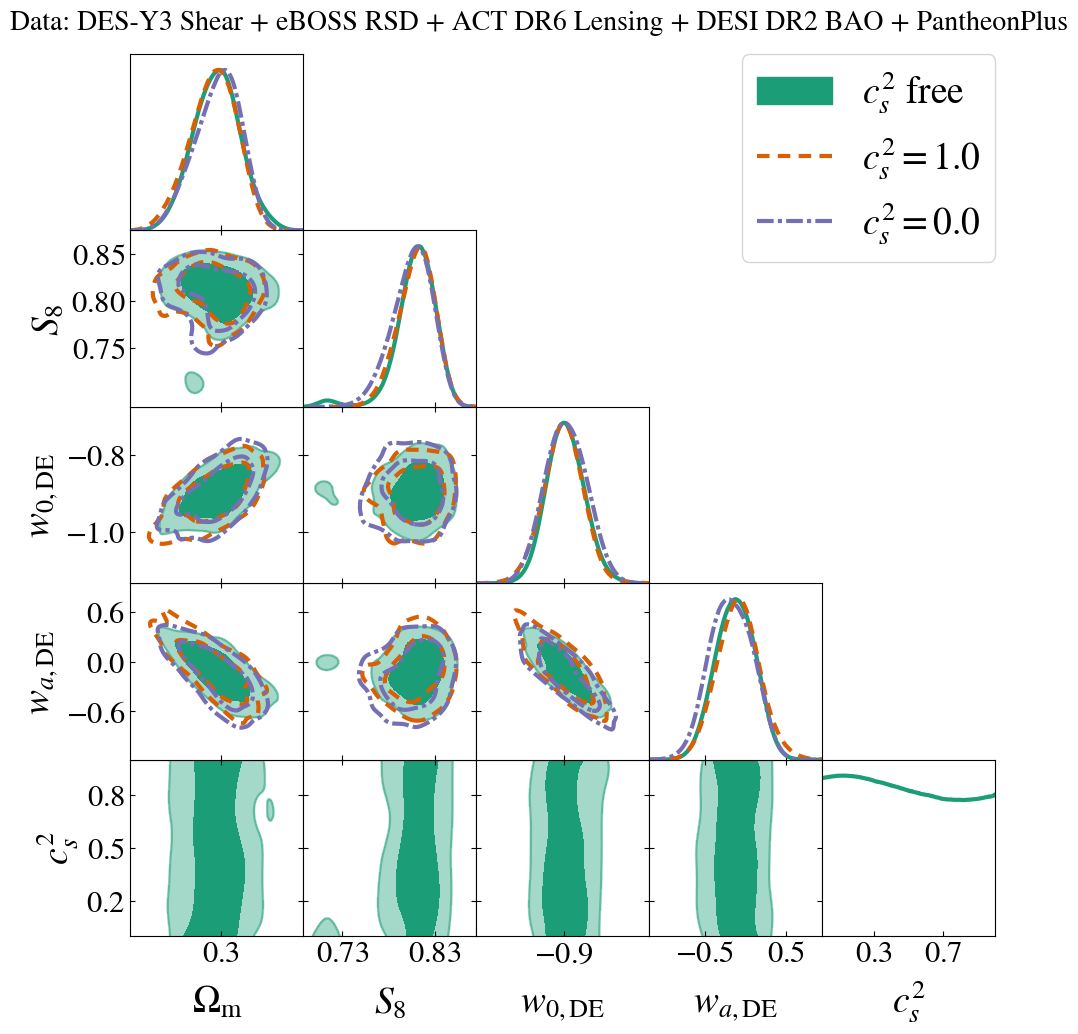

In [16]:
p = gdplot.get_subplot_plotter()
p.settings.axes_fontsize=25
p.settings.axes_labelsize=30
p.settings.legend_fontsize=30
p.triangle_plot(
    [chains[34], chains[32], chains[33]],
    ["omegam", "S8", "w", "wa", "cs2_0"],
    filled=[True, False, False],
    contour_colors=utils.colors,
    contour_lws=3,
    contour_ls=["-", "--", "-."],
    legend_labels=["$c_s^2$ free", "$c_s^2 = 1.0$", "$c_s^2 = 0.0$"],
    legend_loc="upper right"
)
p.fig.text(0.0, 1.01, "Data: DES-Y3 Shear + eBOSS RSD + ACT DR6 Lensing + DESI DR2 BAO + PantheonPlus", fontsize=20)
p.fig.savefig("plots/triangle_desshear_rsd_actcmbl_bao_sn.pdf", bbox_inches="tight")

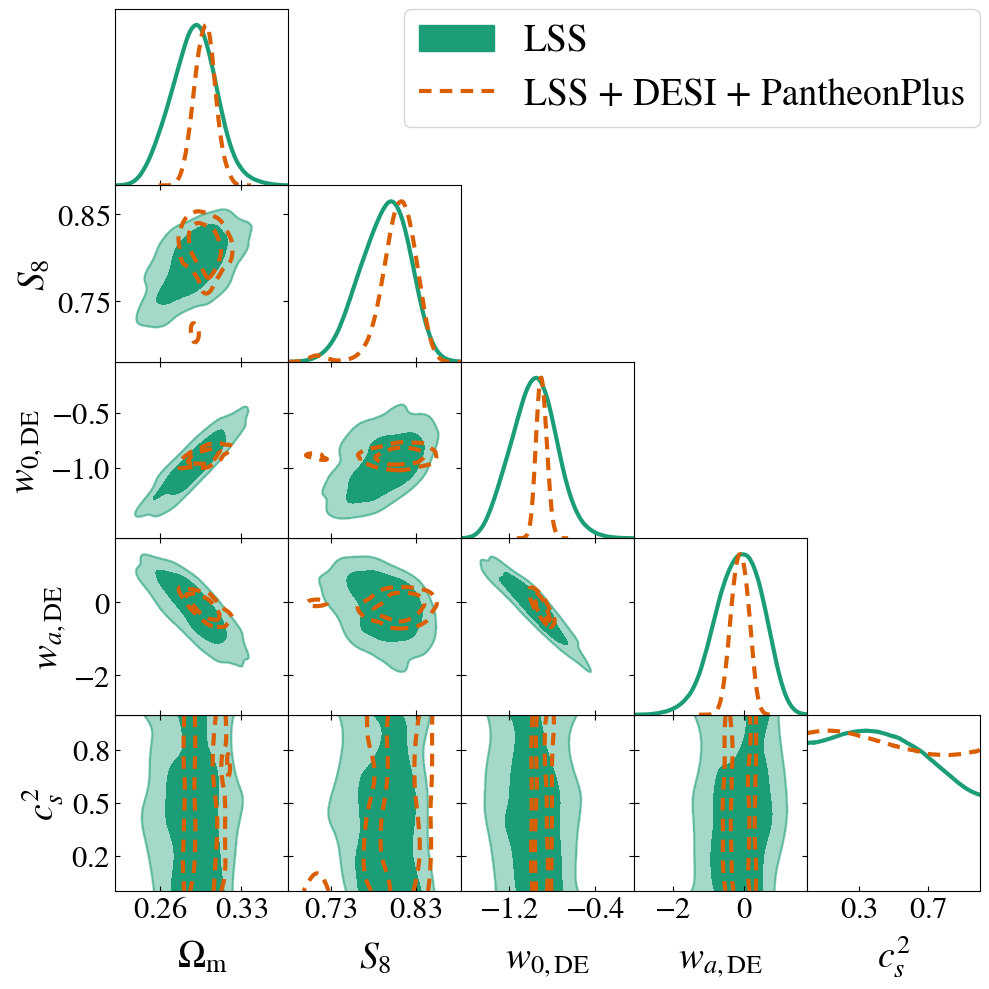

In [19]:
p = gdplot.get_subplot_plotter()
p.settings.axes_fontsize=25
p.settings.axes_labelsize=30
p.settings.legend_fontsize=30
p.triangle_plot(
    [chains[31], chains[34]],
    ["omegam", "S8", "w", "wa", "cs2_0"],
    filled=[True, False, False],
    contour_colors=utils.colors,
    contour_lws=3,
    contour_ls=["-", "--", "-."],
    legend_labels=["LSS", "LSS + DESI + PantheonPlus"],
    legend_loc="upper right"
)
# p.fig.text(0.2, 1.01, "Data: DES-Y3 3x2pt + eBOSS RSD + ACT DR6 Lensing + DESI DR2 BAO + ", fontsize=20)
# p.fig.savefig("plots/triangle_lss_vs_lss_baosn.pdf", bbox_inches="tight")

## Validation plots

Checking if my results agree with Figure 4 of https://arxiv.org/abs/2509.26480

In [3]:
# Loading test chains
chains = {}
for index in range(3, 5):
    chain = getdist.loadMCSamples(f"../chains_test//EXAMPLE_MCMC{index}", settings=utils.DEFAULT_GETDIST_SETTINGS)
    chain.addDerived(chain["sigma8"]*np.sqrt(chain["omegam"]/0.3), name="S8", label="S_8")
    chains[index] = chain

../chains_test/EXAMPLE_MCMC3.1.txt
../chains_test/EXAMPLE_MCMC3.2.txt
../chains_test/EXAMPLE_MCMC3.3.txt
../chains_test/EXAMPLE_MCMC3.4.txt
Removed 0.4 as burn in
../chains_test/EXAMPLE_MCMC4.1.txt
../chains_test/EXAMPLE_MCMC4.2.txt
../chains_test/EXAMPLE_MCMC4.3.txt
../chains_test/EXAMPLE_MCMC4.4.txt
Removed 0.4 as burn in


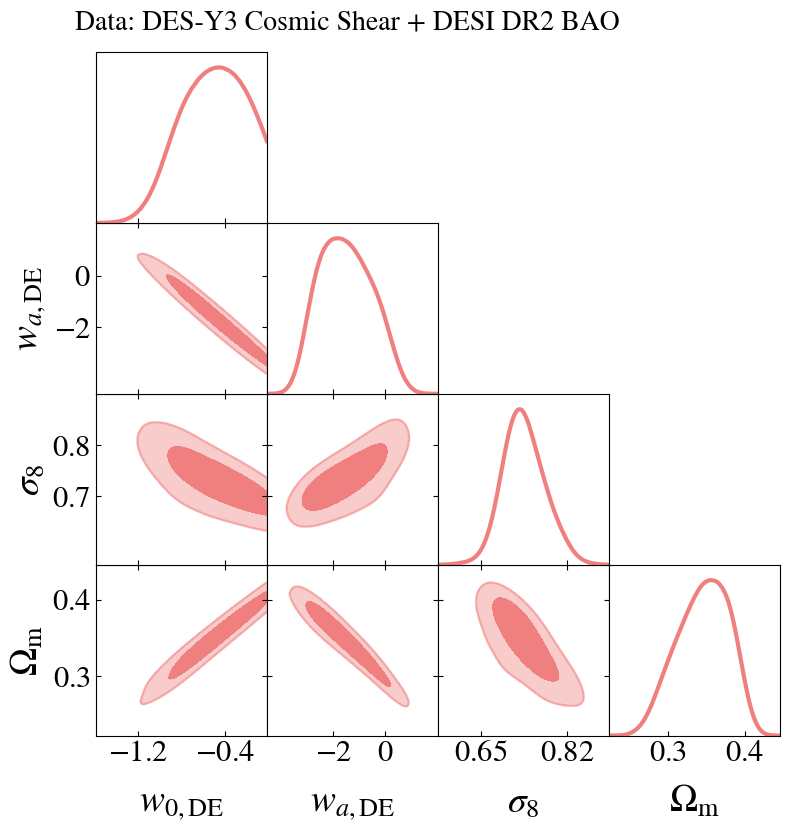

In [7]:
reload(utils)
p = getdist.plots.get_subplot_plotter()
p.settings.axes_fontsize=25
p.settings.axes_labelsize=30
p.settings.legend_fontsize=30
p.triangle_plot(
    chains[3],
    ["w", "wa", "sigma8", "omegam"],
    filled=[True, False],
    contour_colors=["lightcoral"],
    contour_lws=3,
    legend_labels=[],
    legend_loc="right"
)
p.fig.text(0.1, 1.01, "Data: DES-Y3 Cosmic Shear + DESI DR2 BAO", fontsize=20)
# p.fig.legend(handles=legend_handles, fontsize=20, bbox_to_anchor=(1, 0.93))
p.fig.savefig("plots/kunhao_fig4_reproduction.pdf", bbox_inches="tight")

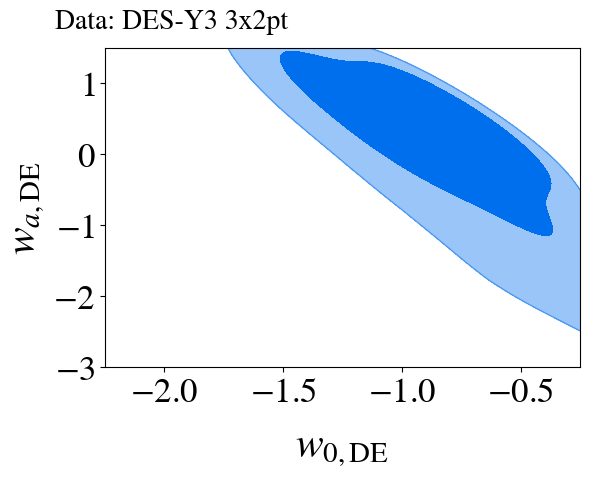

In [9]:
reload(utils)
p = getdist.plots.get_single_plotter()
p.settings.axes_fontsize=25
p.settings.axes_labelsize=30
p.settings.legend_fontsize=30
p.plot_2d(
    chains[2],
    ["w", "wa"],
    filled=[True, False],
    contour_colors=utils.colors,
    contour_lws=3,
    legend_labels=[],
    legend_loc="right",
    lims=[-2.25, -0.25, -3, 1.5]
)
p.fig.text(0.1, 1.01, "Data: DES-Y3 3x2pt", fontsize=20)
# p.fig.legend(handles=legend_handles, fontsize=20, bbox_to_anchor=(1, 0.93))
p.fig.savefig("plots/des_y3_3x2pt_w0wa_test.pdf", bbox_inches="tight")